In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
from skimage import measure
from skimage.draw import rectangle_perimeter

In [11]:
#images_folder = "../sample_dataset/Original"
images_folder = '../Figs'
path_files_images = glob.glob(f"{images_folder}/*.*")
print('Path imagens: ', path_files_images[:])

#masks_folder = "../sample_dataset/Original - masks"
masks_folder = '../Figs'
path_files_masks = glob.glob(f"{masks_folder}/*.*")
print('Path masks: ', path_files_masks[:2])


Path imagens:  ['../Figs\\cell_crop_train.png', '../Figs\\crop_cell.png', '../Figs\\gif_run_cell.gif', '../Figs\\img_exemplo.png', '../Figs\\masks_crop_train.png', '../Figs\\mask_exemplo.png', '../Figs\\orig_zoom.png', '../Figs\\ori_mask_overlay.png', '../Figs\\Ori_mask_train.png']
Path masks:  ['../Figs\\cell_crop_train.png', '../Figs\\crop_cell.png']


In [14]:
id = 5

mask_exemple = cv2.imread(path_files_masks[id], cv2.IMREAD_GRAYSCALE)
print('Shape imagens: ', mask_exemple.shape)
print('Imagens unique values: ', np.unique(mask_exemple))

Shape imagens:  (540, 720)
Imagens unique values:  [  0 255]


(-0.5, 719.5, 539.5, -0.5)

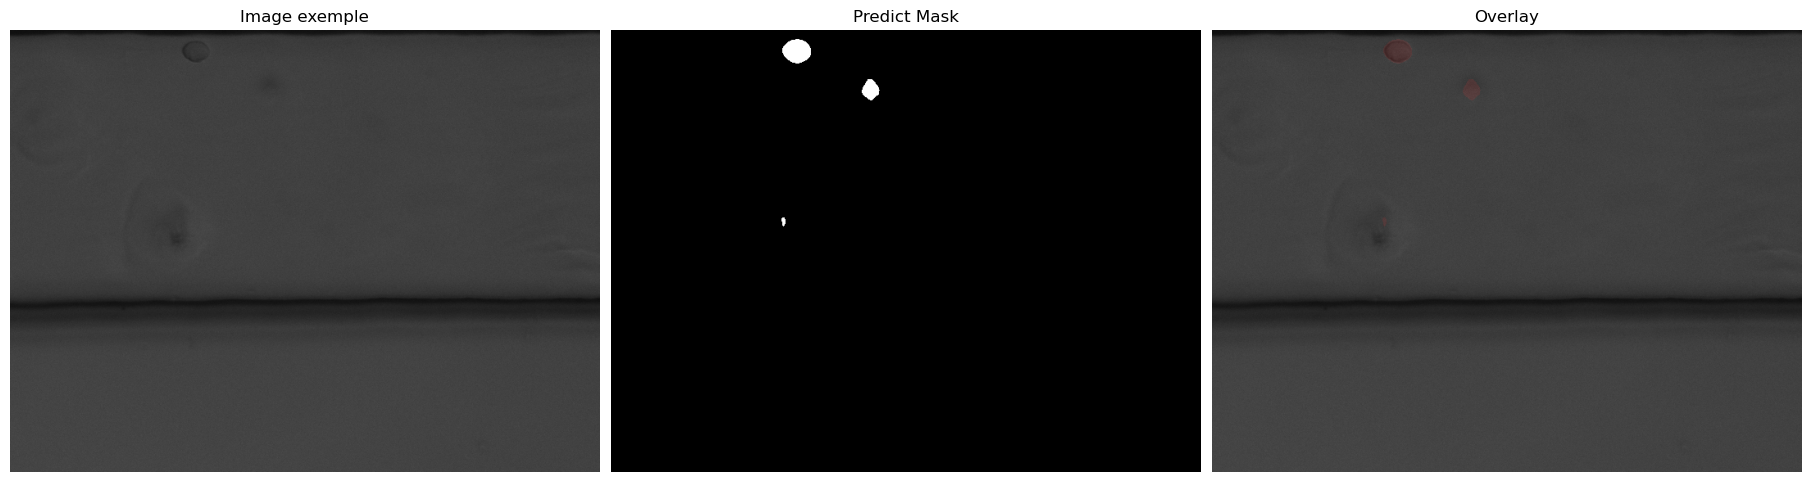

In [17]:
fig, axs = plt.subplots(1, 3, layout='constrained', figsize=(18, 10))

image_exemple = cv2.imread(path_files_images[3])
mask_exemple = cv2.imread(path_files_masks[5])

mask2overlay = mask_exemple.copy()
mask2overlay[:,:,1:] = 0 # Keep only red channel
overlay = cv2.addWeighted(image_exemple, 1, mask2overlay, 0.1, 0)

axs[0].set_title('Image exemple')
axs[0].imshow(image_exemple, cmap = 'gray')
axs[0].axis('off')

axs[1].set_title('Predict Mask')
axs[1].imshow(mask_exemple, cmap = 'gray')
axs[1].axis('off')

axs[2].set_title('Overlay')
axs[2].imshow(overlay)
axs[2].axis('off')


(-0.5, 44.5, 37.5, -0.5)

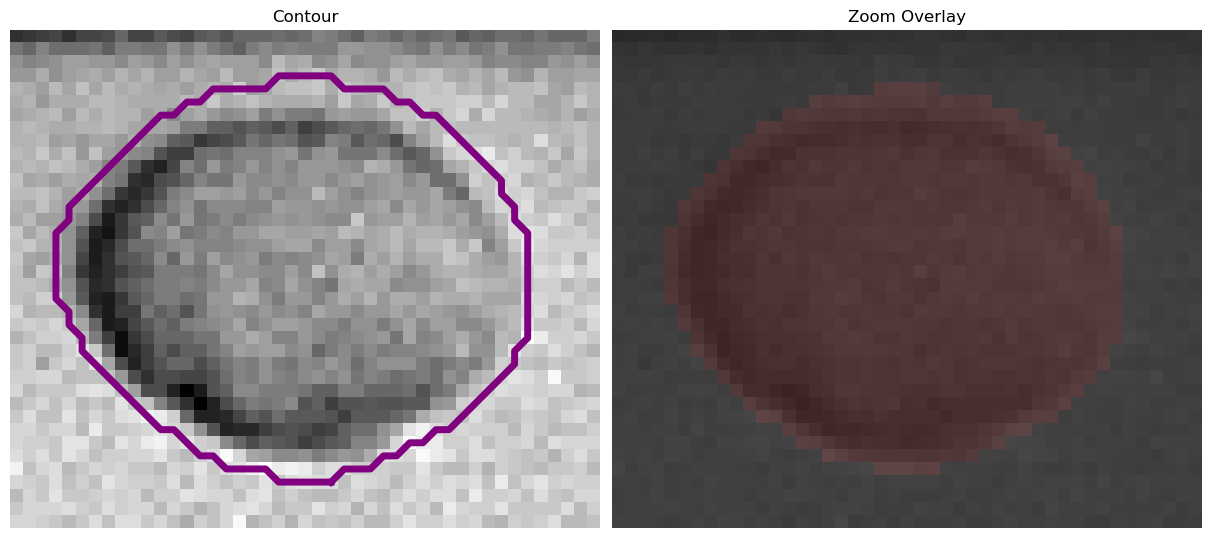

In [18]:
y0, y1 = 7, 45
x0, x1 = 205, 250

contours = measure.find_contours(mask_exemple[y0:y1,x0:x1,0], 0.8)

fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(12, 6))

ax[0].set_title('Contour')
ax[0].imshow(image_exemple[y0:y1,x0:x1, 0], cmap='gray')

for contour in contours:
    ax[0].plot(contour[:, 1], contour[:, 0], linewidth=5, color = 'purple')

ax[0].axis("off")

ax[1].set_title('Zoom Overlay')
ax[1].imshow(overlay[y0:y1,x0:x1])
ax[1].axis('off')

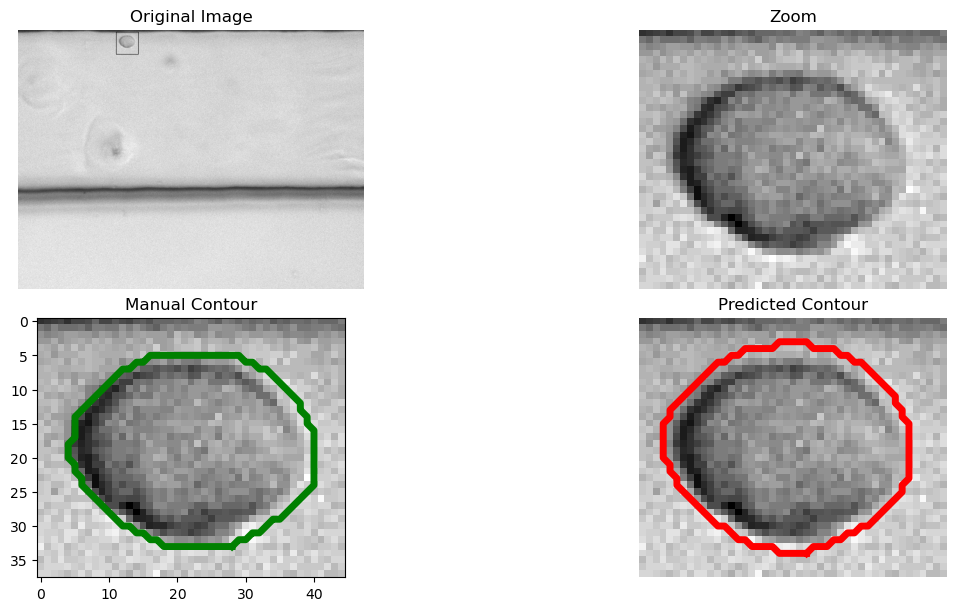

In [37]:
image_for_crop = cv2.imread(path_files_images[3], cv2.IMREAD_GRAYSCALE)
img_crop = image_for_crop[y0:y1,x0:x1]
img_manual = cv2.imread('../Figs\Mask_MANUAL.png', cv2.IMREAD_GRAYSCALE)
start = (y0, x0)
extent = (45, 45)  

rr, cc = rectangle_perimeter(start=start, extent=extent, shape=image_for_crop.shape)
image_for_crop[rr, cc] = 1



fig, ax = plt.subplots(2, 2, layout='constrained', figsize=(12, 6))

contours = measure.find_contours(mask_exemple[y0:y1,x0:x1,0], 0.8)

contours_manual = measure.find_contours(img_manual, 0.8)



ax[1,1].set_title('Predicted Contour')
ax[1,1].imshow(image_exemple[y0:y1,x0:x1, 0], cmap='gray')

for contour in contours:
    ax[1,1].plot(contour[:, 1], contour[:, 0], linewidth=5, color = 'red')

ax[1,1].axis("off")

for contour in contours_manual:
    ax[1,0].plot(contour[:, 1], contour[:, 0], linewidth=5, color = 'green')

ax[1,0].set_title('Manual Contour')
ax[1,0].imshow(img_crop, cmap = 'gray')


ax[0,0].set_title('Original Image')
ax[0,0].imshow(image_for_crop, cmap='gray')

ax[0,0].axis("off")

ax[0,1].set_title('Zoom')
ax[0,1].imshow(img_crop, cmap='gray')
ax[0,1].axis('off')
plt.show()

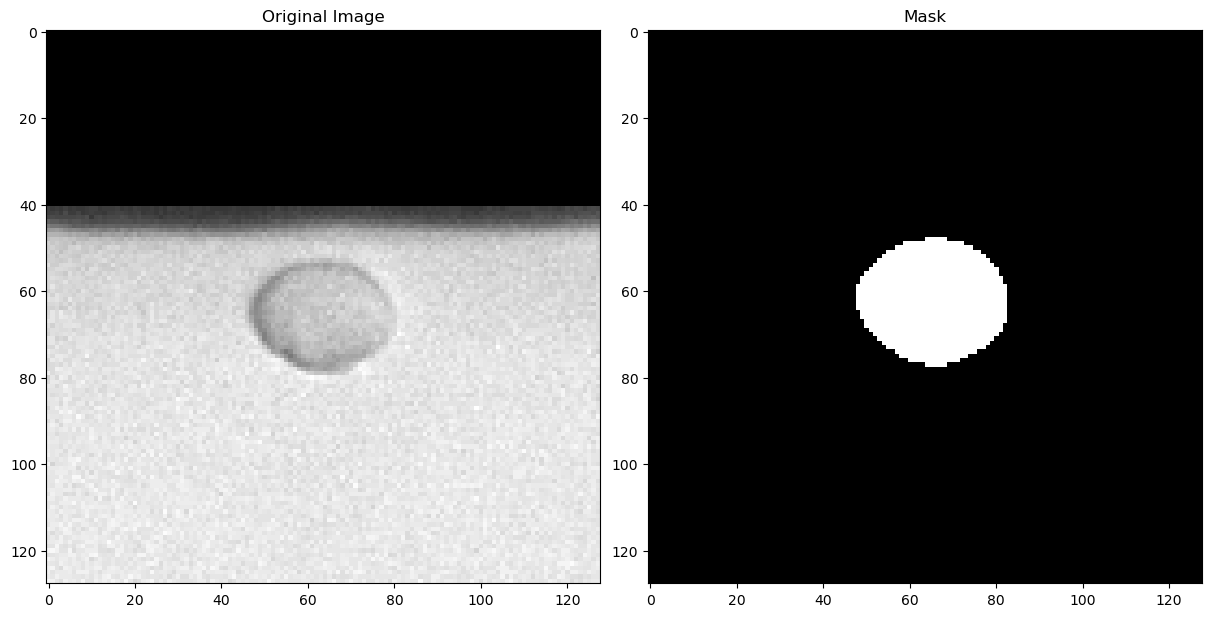

In [ ]:
cell_crop_train = cv2.imread('../Figs\cell_crop_train.png', cv2.IMREAD_GRAYSCALE)
mask_crop_train = cv2.imread('../Figs\masks_crop_train.png', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(12, 6))

ax[0].set_title('Original Image')
ax[0].imshow(cell_crop_train, cmap='gray')

ax[0].axis("on")

ax[1].set_title('Mask')
ax[1].imshow(mask_crop_train, cmap='gray')
ax[1].axis('on')

plt.show()